In [20]:
#Importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.cross_validation import ShuffleSplit

#Import visuals
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#Load Boston housing Dataset
data = pd.read_csv("housing.csv")
prices = data['MEDV']
features = data.drop('MEDV',axis=1)
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
print data.head()

Boston housing dataset has 489 data points with 4 variables each.
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [2]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**


### Answer 1

- For an increase in value of 'RM' the house price should increase as well. Common sense detects that if a house has 7 rooms it will be priced higher than a house that has just 4 or 5 rooms. 
- For an increase in value of 'LSTAT' the house price may tend to decrese. As the population of lower working class in an area increases, the prices of the house around that area would tend to be low as the population would find it tough to afford higher priced houses.
- For an increas in 'PTRATIO' the price of the houses will increase as well as this points to an area where there is greater focus on learning for the pupils and that definitely warrants a higher cost.

### Question 2: Goodness of Fit

In [3]:
# Importing R2 score
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable?
* Why or why not?

### Answer 2
- Yes this model captures the variation of the target variable quite. The R2 score of 0.923 is quite good when we consider that an R2 score of 1 perfectly predicts the target variable. The model can successfully capture more than 90% of the variance in our target variable.

### Question 3: Training and Testing

In [11]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.25, random_state=1)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?


### Answer 3
- Splitting the data set into the training and test sets solves the problem of overfitting of the model. Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

### Question 4: Learning the Data

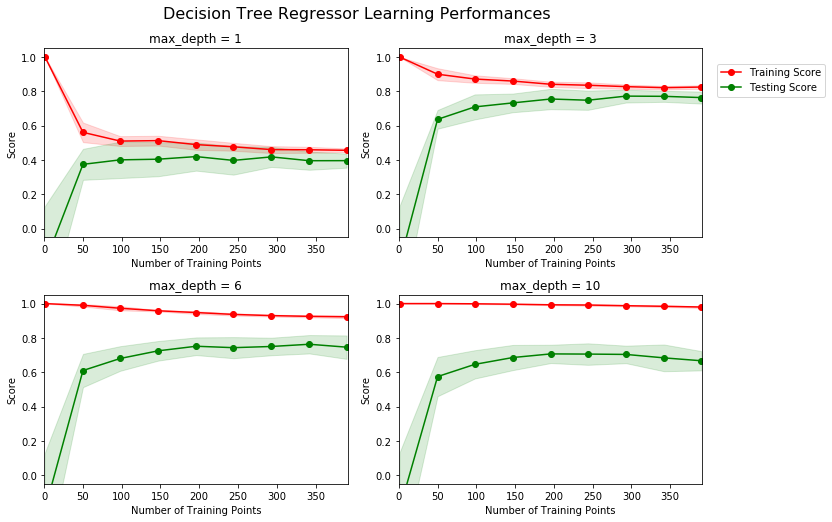

In [12]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

- Choose one of the graphs above and state the maximum depth for the model.
- What happens to the score of the training curve as more training points are added? What about the testing curve?
- Would having more training points benefit the model?

### Answer 4
- Chose Graph : Graph2 with  max_depth = 3
- As the number of training points increases, the testing score first increase and then tends to converge as the model starts learning about the data better and effectively predict the labels
- As the numbre of traning points increases, the training score first starts to decrease as the number increases and then starts to converge
- Generally speaking, the more data we have, the better. However if the training and testing curves are converging with a score above the benchmark threshold, then we need to decide if the extra time and memory space needed to train the data is worth it and we may not proceed with the additional training.

### Question 5: Bias Variance Tradeoff

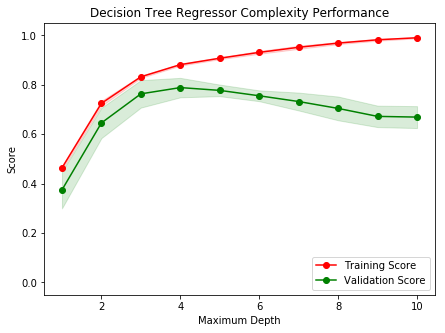

In [16]:
# Complexity Curve
vs.ModelComplexity(X_train, y_train)

- When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
- How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

### Answer 5
- When the model is trained with a maximum depth of 1, then the model suffers from high bias. This is a case of udnerfitting where the model is too simple.
- When the model is trained with a maximum depth of 10, then the model suffers from a high variance. This is a case of overfitting where the model tries to byheart the data. The visual clues that we get is that when the depth is high the validation score is quite lower than the training score. 

### Question 6: best guess optimal model
- Which maximum depth do you think results in a model that best generalizes to unseen data?
- What intuition lead you to this answer?

### Answer 6
- I believe the model with maximum depth of 4 would best generalize to unseen data.
- The reason i believe that is because at max depth of 4 both the training score and validation score are close enough, and the validation score is quite good and the model would be just right.

### Question 7: Grid Search
- What is the grid search technique?
- How it can be applied to optimize a learning algorithm?

### Answer 7
- Models or estimators may have some parameters that cannot be learned directly. Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma.  Grid Search exhaustively considers all parameter combinations for specialized, efficient parameters. When fitting it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

- It is common that a small subset of these parameters can have a large impact on the predictive or computation performance of the model hence getting the best values for them is quite important. In many cases, we may leave it to default values as well.


### Question 8: Cross Validation
- What is the k-fold cross-validation training technique?
- What benefit does this technique provide for grid search when optimizing a model?

### Answer 8
In k-fold cross validation technique, we divide the data into buckets (number of data points / k) and we run k separate learning experiments :
- Pick a testing set 
- Train on the other remaing bucket 
- Test on the testing set we picked earlier
Once we do this for k times, we then average the test results from these k experiments

Though this is computationally expensive, we utilize all data for training and hence better estimator.

In [17]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9: Optimal Model
- What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?

In [18]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])
print reg.get_params()

Parameter 'max_depth' is 4 for the optimal model.
{'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': None, 'max_features': None, 'max_depth': 4}


### Answer 9
- Maximum depth is 4. That is the same as i guessed for Question 6.

### Question 10: Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [26]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)


Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $231,918.75
Predicted selling price for Client 3's home: $937,230.00


### Answer 10
The prdicted prices are:
- Predicted selling price for Client 1's home: $411,417.39

- Predicted selling price for Client 2's home: $231,918.75

- Predicted selling price for Client 3's home: $937,230.00

Does the price seem reasonable ?
Before answering that let us have a look at some values from the data set.
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00

Client 1's home seem reasonably priced, though it is quite near to the median price it is just a tad below that. WIth the number of rooms and the poverty level in the area and the pupil techer ratio it seems fair. 

As expected Cleint 2's home price should have been lower amongst the three and the model does predict that. The price is in the lower range as the population is more poorer and the pupil teacher ratio is also more.

As for Client 3's price, this seems reasonable given the low poverty level and student-to-teacher ratio with a high number of rooms. The value is quite above the median but as we see from the data set, the maximum priced house had very similar features as compared to the Client 3's house and hence the price is justified.

In [27]:
# See features of the maximum priced house
data[data.MEDV == 1024800.0]

,RM,LSTAT,PTRATIO,MEDV
253,8.398,5.91,13.0,1024800.0


### Question 11: Applicability

In [28]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


- In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  



### Answer 11
Though the constructed model, fits well for our cuurent data set but that may not be the case in a real world setting.
- The data set is quite old and the demographics may have changed a lot.
- We have a very limited number of features used here. Other features should be used as well. For example, one may consider the sqaure foot area of the home an important factor or the proximity from local markets and hospitals. A lot of other features need to be included in the model.
- The range in price is also quite high, which suggests that the model may not be a good fit fot real world.
- House prices in Boston may not be indicative of the prices of those of a rural area. For example, an urban home generally costs more than one in a rural area hence we cannot directly use the same model for different scenarios.